### Data Set: Tokyo
Visualización de datos del data set Tokyo.</br>
Exportación de librerias de Visualización del data set:

In [12]:
from pandasgui import show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import plotly.graph_objects as go
from geopy.distance import great_circle


#plt.style.use("seaborn")

### Tipo de datos dentro del dataset

#### Tenemos las siguientes columnas:

- **id:** Un identificador único para cada registro en tu conjunto de datos. 
- **name:** El nombre o título de la propiedad o alojamiento.
- **host_id:** El identificador único del anfitrión.
- **host_name:** El nombre del anfitrión.
- **neighbourhood_group:** La agrupación o categorización de vecindarios más grande o de nivel superior en una ciudad o área geográfica.
- **neighbourhood:** El nombre del vecindario o área geográfica específica en la que se encuentra la propiedad. Esto proporciona información sobre la ubicación de la propiedad. En este data set hay 4 tipos: **- ku: Distrito, - shi: Gran Ciudad, - machi: Ciudad, - mura: Pueblo.**
- **latitude:** La latitud geográfica de la ubicación de la propiedad. 
- **longitude:** La longitud geográfica de la ubicación de la propiedad. 
- **room_type:** El tipo de habitación o alojamiento, en este dataset: "habitación privada", "casa/apartamento completo" o "habitación compartida".
- **price:** El precio de alquiler por noche o por estancia en la propiedad. 
- **minimum_nights:** El número mínimo de noches que un huésped debe reservar para quedarse en la propiedad.
- **number_of_reviews:** El número total de revisiones o comentarios que ha recibido la propiedad hasta la fecha.
- **last_review:** La fecha de la última revisión o comentario dejado por un huésped en la propiedad.
- **reviews_per_month:** El promedio de revisiones o comentarios dejados por los huéspedes por mes.




## ¿Cómo afrontar el análisis?

Al no tener preguntas que resolver por parte del cliente, se realzará un análisis de datos generalista con los datos proporcionados.
En este caso, intentaremos despejar las claves principales a la hora de reservar y/o decicir que tipo de alomajamiento, las pernoctas, la situación geográfica y si influye de alguna forma las reseñas que tiene cada alojamiento. 


#### Primeras Hipótesis
Tenemos cuatro grandes hipótesis: 
1-. Influencia de la situación respecto al centro y a los lugares de interés de Tokyo. Puede darnos un poco de luz saber la log/lat de los puntos de 
    interés más icónicos de Tokyo.
    Primero, analizaremos 



In [13]:
df = pd.read_csv("../data/tokyo_airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24


In [14]:
show (df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\psych\AppData\Local\Temp\ipykernel_20804\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\psych\AppData\Local\Temp\ipykernel_20804\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\psych\AppData\Local\Temp\ipykernel_20804\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\psych\AppData\Local\Temp\ipykernel_20804

Aplicamos una función para saber: 
Dataset tiene 14 columnas y 11466 fila.
- Valores únicos
- Ausencia de valores 
- Porcentaje de ausencia de valores
- Duplicado
- Tipo de valores

In [15]:
def summary(df):
    total_values = df.shape[0]
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / total_values) * 100
    duplicated_counts = [df[col].duplicated().sum() for col in df.columns]
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} rows.")

    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary['Missing %'] = ((missing_data / total_values) * 100).round(2)    
    summary["Duplicated"] = duplicated_counts
    summary["Types"] = df.dtypes
    
    return summary

# Call the summary function with your DataFrame
summary(df)

Dataset has 14 features and 11466 rows.


,Unique,Missing,Missing %,Duplicated,Types
id,11466,0,0.00,0,int64
name,10810,0,0.00,656,object
host_id,2954,0,0.00,8512,int64
host_name,2054,16,0.14,9411,object
neighbourhood_group,0,11466,100.00,11465,float64
neighbourhood,56,0,0.00,11410,object
latitude,7295,0,0.00,4171,float64
longitude,8140,0,0.00,3326,float64
room_type,3,0,0.00,11463,object
price,371,0,0.00,11095,int64


In [16]:
df.drop('neighbourhood_group', axis=1, inplace=True)

La columna que no tiene ninguna importancia dentro de la ciudad de Tokyo es: neighbourhood_group, ya que el peso de porcentajes ausentes es del 100%. 
Las columnas last_review, reviews_per_month tiene un porcentaje de usencia del 14,63%. Esto va a ser un problema más adelante, pero las necesitaremos para ver un par de teorías sobre el comportamiento de los usuarios a la hora de alquilar sin importar las noches, el precio por noche y/o el tipo de habitación.


Viéndo por encima el data set, nos surgen las primeras hipótesis en las que estaremos trabajando, hasta que los datos nos muestren lo contrario: 

## Primeras hipótesis: 

- Influencia de geografica
- Tipo de habitación por precio
- Tipo de habitación por precio, zona y noches mínimas
- Afectación de las rewievs con el alquiler.




De momento, vamos a ver que outliers tenemos con la variable: 'price' en el eje Y en cada columna, para poder hacernos una idea y ver como podemos balancearlos.

In [17]:

# Función para extraer la segunda palabra de una cadena
def barrio(neighbourhood):
    palabras = neighbourhood.split()  # Divide la cadena en palabras
    if len(palabras) >= 2:
        return palabras[1]  # Devuelve la segunda palabra
    else:
        return None  # Si no hay segunda palabra, devuelve None

# Aplicar la función a la columna 'neighbourhood' y crear una nueva columna 'segunda_palabra_neighbourhood'
df['segunda_palabra_neighbourhood'] = df['neighbourhood'].apply(barrio)

df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,segunda_palabra_neighbourhood
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20,Ku
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65,Ku
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25,Ku
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55,Ku
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24,Ku


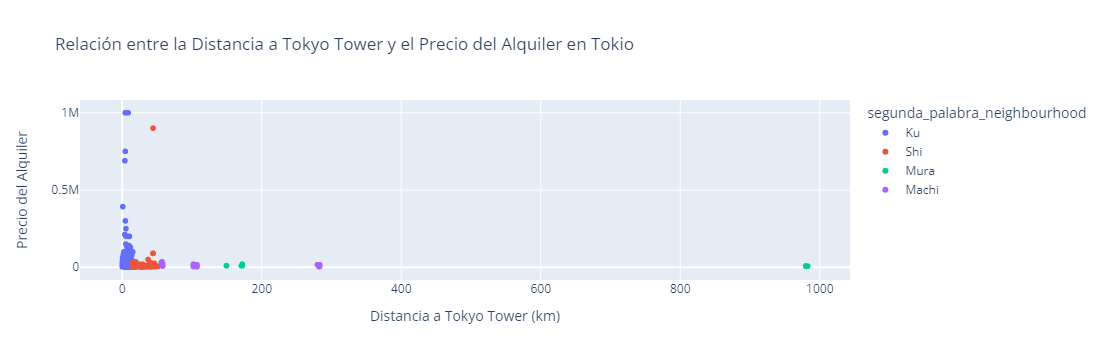

In [24]:
import pandas as pd
import plotly.express as px
from geopy.distance import great_circle

# Lista de sitios turísticos en Tokio con sus coordenadas (latitud, longitud)
sitios_turisticos_tokio = [
    {"name": "Tokyo Tower", "latitude": 35.6586, "longitude": 139.7454},
    {"name": "Senso-ji Temple", "latitude": 35.7146, "longitude": 139.7966},
    {"name": "Shibuya Crossing", "latitude": 35.6614, "longitude": 139.7041},
    {"name": "Shinjuku Gyoen National Garden", "latitude": 35.6852, "longitude": 139.7102},
    {"name": "Akihabara Electric Town", "latitude": 35.6997, "longitude": 139.7710},
    {"name": "Meiji Shrine", "latitude": 35.6764, "longitude": 139.6993},
    {"name": "Tsukiji Fish Market", "latitude": 35.6654, "longitude": 139.7707},
    {"name": "Odaiba", "latitude": 35.6190, "longitude": 139.7798},
    {"name": "Tokyo Disneyland", "latitude": 35.6329, "longitude": 139.8809},
    {"name": "Tokyo Skytree", "latitude": 35.7101, "longitude": 139.8107},
    {"name": "Ghibli Museum", "latitude": 35.6962, "longitude": 139.5704},
    {"name": "Ueno Park", "latitude": 35.7147, "longitude": 139.7732},
    {"name": "Oedo Onsen Monogatari", "latitude": 35.6298, "longitude": 139.7779},
    {"name": "Tokyo Imperial Palace", "latitude": 35.6812, "longitude": 139.7528},
    {"name": "Roppongi Hills", "latitude": 35.6604, "longitude": 139.7294},
    {"name": "Tokyo National Museum", "latitude": 35.7189, "longitude": 139.7766},
    {"name": "Mount Fuji", "latitude": 35.3606, "longitude": 138.7274},
    {"name": "Nikko Toshogu Shrine", "latitude": 36.7519, "longitude": 139.5996},
    {"name": "Hachiko Statue", "latitude": 35.6586, "longitude": 139.7016},
    {"name": "Robot Restaurant", "latitude": 35.6951, "longitude": 139.6911}
]

# Calcular la distancia entre cada propiedad y los sitios turísticos en Tokio
for sitio in sitios_turisticos_tokio:
    sitio_lat = sitio["latitude"]
    sitio_lon = sitio["longitude"]
    sitio_name = sitio["name"]
    
    # Calcular la distancia y agregarla como una nueva columna al DataFrame
    df[sitio_name + "_distance"] = df.apply(lambda row: great_circle((row["latitude"], row["longitude"]), (sitio_lat, sitio_lon)).kilometers, axis=1)

# Análisis de la influencia de la distancia a sitios turísticos en el precio del alquiler
fig = px.scatter(df, x="Tokyo Tower_distance", y="price", color="segunda_palabra_neighbourhood",
                 labels={"Tokyo Tower_distance": "Distancia a Tokyo Tower (km)", "price": "Precio del Alquiler"},
                 title="Relación entre la Distancia a Tokyo Tower y el Precio del Alquiler en Tokio")

# Mostrar la gráfica interactiva
fig.show()


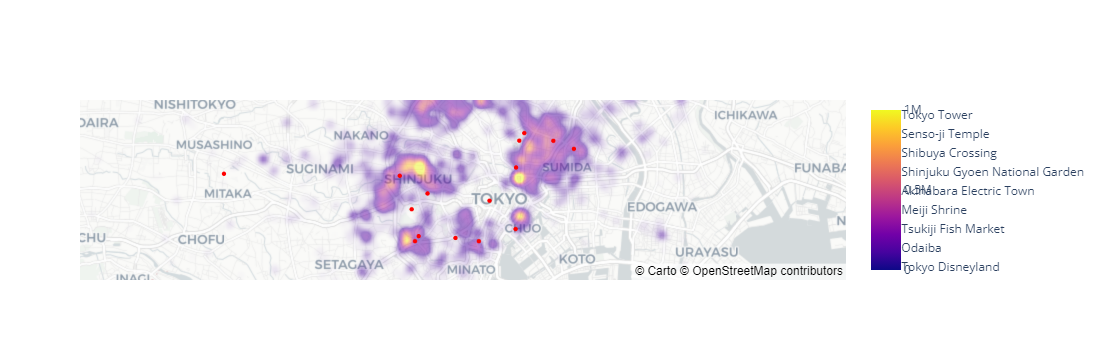

In [28]:
# Lista de sitios turísticos en Tokio con sus coordenadas (latitud, longitud)
sitios_turisticos_tokio = [
    {"name": "Tokyo Tower", "latitude": 35.6586, "longitude": 139.7454},
    {"name": "Senso-ji Temple", "latitude": 35.7146, "longitude": 139.7966},
    {"name": "Shibuya Crossing", "latitude": 35.6614, "longitude": 139.7041},
    {"name": "Shinjuku Gyoen National Garden", "latitude": 35.6852, "longitude": 139.7102},
    {"name": "Akihabara Electric Town", "latitude": 35.6997, "longitude": 139.7710},
    {"name": "Meiji Shrine", "latitude": 35.6764, "longitude": 139.6993},
    {"name": "Tsukiji Fish Market", "latitude": 35.6654, "longitude": 139.7707},
    {"name": "Odaiba", "latitude": 35.6190, "longitude": 139.7798},
    {"name": "Tokyo Disneyland", "latitude": 35.6329, "longitude": 139.8809},
    {"name": "Tokyo Skytree", "latitude": 35.7101, "longitude": 139.8107},
    {"name": "Ghibli Museum", "latitude": 35.6962, "longitude": 139.5704},
    {"name": "Ueno Park", "latitude": 35.7147, "longitude": 139.7732},
    {"name": "Oedo Onsen Monogatari", "latitude": 35.6298, "longitude": 139.7779},
    {"name": "Tokyo Imperial Palace", "latitude": 35.6812, "longitude": 139.7528},
    {"name": "Roppongi Hills", "latitude": 35.6604, "longitude": 139.7294},
    {"name": "Tokyo National Museum", "latitude": 35.7189, "longitude": 139.7766},
    {"name": "Mount Fuji", "latitude": 35.3606, "longitude": 138.7274},
    {"name": "Nikko Toshogu Shrine", "latitude": 36.7519, "longitude": 139.5996},
    {"name": "Hachiko Statue", "latitude": 35.6586, "longitude": 139.7016},
    {"name": "Robot Restaurant", "latitude": 35.6951, "longitude": 139.6911}
]

# Calcular la distancia entre cada propiedad y los sitios turísticos en Tokio
for sitio in sitios_turisticos_tokio:
    sitio_lat = sitio["latitude"]
    sitio_lon = sitio["longitude"]
    sitio_name = sitio["name"]
    
    # Calcular la distancia y agregarla como una nueva columna al DataFrame
    df[sitio_name + "_distance"] = df.apply(lambda row: great_circle((row["latitude"], row["longitude"]), (sitio_lat, sitio_lon)).kilometers, axis=1)

# Crear un mapa interactivo con marcadores de sitios turísticos
fig = go.Figure()

# Añadir marcadores de sitios turísticos
for sitio in sitios_turisticos_tokio:
    fig.add_trace(go.Scattermapbox(
        lat=[sitio["latitude"]],
        lon=[sitio["longitude"]],
        mode='markers',
        marker=go.scattermapbox.Marker(size=5, color='red'),
        text=sitio["name"],
        name=sitio["name"]
    ))

# Crear un mapa de calor para los precios de alquiler
fig.add_trace(px.density_mapbox(df, 
                                 lat="latitude", 
                                 lon="longitude", 
                                 z="price", 
                                 radius=10,
                                 color_continuous_scale="Viridis",
                                 opacity=0.5).data[0])

# Configurar diseño del mapa
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=10,
    mapbox_center={"lat": df["latitude"].mean(), "lon": df["longitude"].mean()}
)

# Mostrar el mapa interactivo
fig.show()

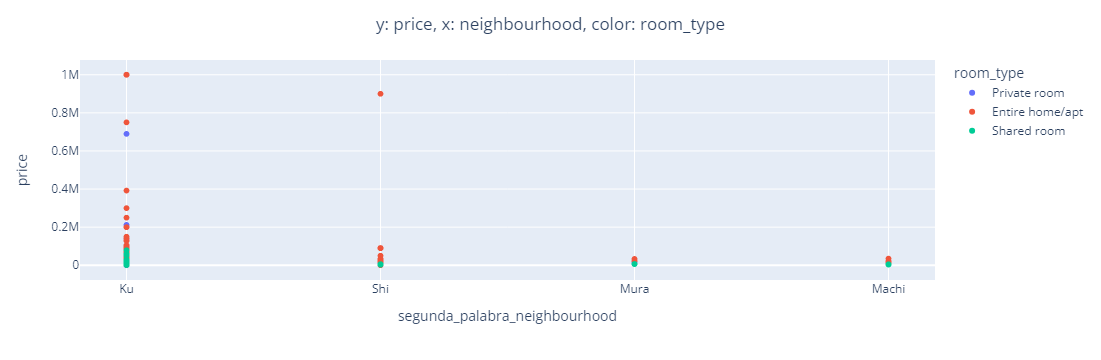

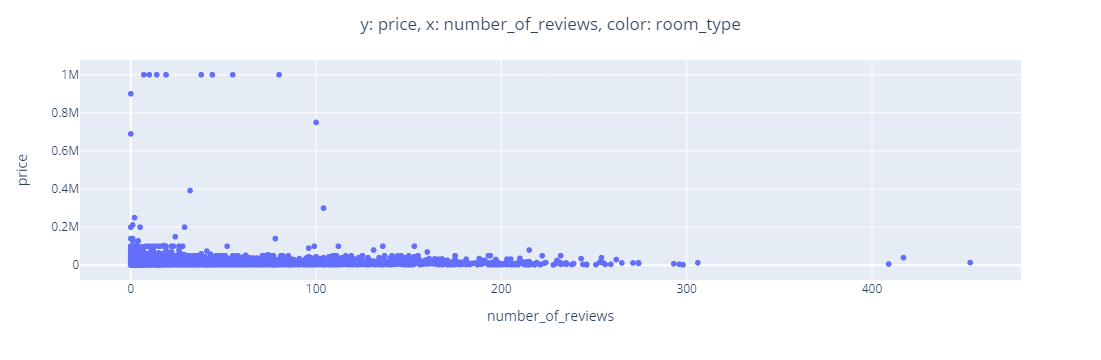

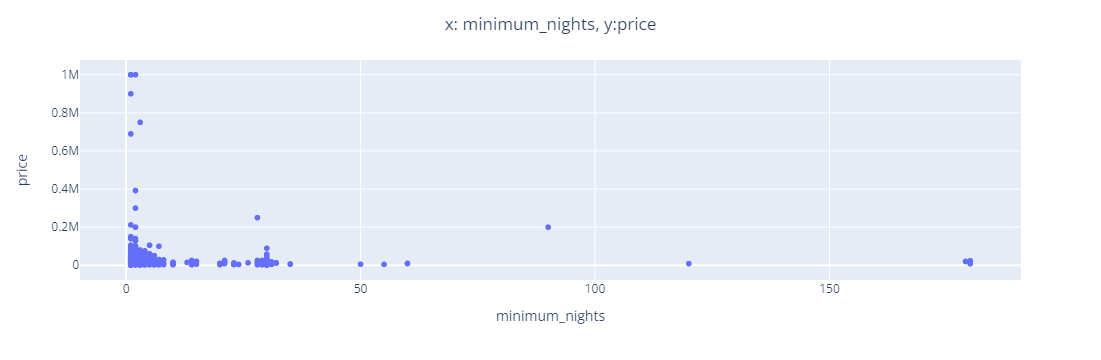

In [29]:

fig1 = px.scatter(data_frame=df, x='segunda_palabra_neighbourhood', y='price', color='room_type')
fig1.update_layout(title_text='y: price, x: neighbourhood, color: room_type', title_x=0.5)
fig1.show()

fig2 = px.scatter(data_frame=df, x='number_of_reviews', y='price')
fig2.update_layout(title_text='y: price, x: number_of_reviews, color: room_type', title_x=0.5)
fig2.show()

fig3 = px.scatter(data_frame=df, x='minimum_nights', y='price' )
fig3.update_layout(title_text='x: minimum_nights, y:price', title_x=0.5)
fig3.show()
